<h1><strong><u>Assignment 6 (PCA/Cluster)</u></strong></h1>

In [ ]:
%%capture
%run DataPreparation.ipynb

In [49]:
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]
display(X_train_numerical.describe())
display(X_test_numerical.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,266.000000,266.000000,266.000000,266.000000
mean,44.497744,17.134962,201.808271,4253.289474
std,5.365930,2.020036,13.755167,793.770550
min,34.000000,13.100000,172.000000,2700.000000
25%,39.725000,15.300000,190.250000,3650.000000
50%,45.350000,17.450000,198.000000,4100.000000
75%,49.075000,18.700000,214.000000,4850.000000
max,59.600000,21.500000,230.000000,6300.000000


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,67.000000,67.000000,67.000000,67.000000
mean,41.988060,17.283582,197.626866,4023.507463
std,5.451731,1.762109,14.638923,829.976732
min,32.100000,13.700000,174.000000,2850.000000
25%,37.700000,16.250000,187.500000,3375.000000
50%,41.300000,17.200000,193.000000,3800.000000
75%,45.750000,18.500000,207.500000,4612.500000
max,54.300000,21.100000,231.000000,5950.000000


<h2><strong><u>Model Selection</u></strong></h2>

In [50]:
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)
display(X_train_numerical_scaled)
display(X_test_numerical_scaled)

array([[ 0.33650327, -0.66210634,  0.96084593,  1.00559581],
       [ 1.19537979,  0.37943858, -0.42305699, -0.72990811],
       [ 0.0937773 , -0.86049585,  1.32503091,  1.00559581],
       ...,
       [-0.57838693,  0.67702284,  0.01396499, -0.47747117],
       [-0.46635956,  1.17299661, -0.131709  , -0.25658886],
       [ 1.12069487,  0.62742547, -0.131709  , -1.07700889]])

array([[-1.28789362, -0.06693781, -1.22426394, -0.82457196],
       [-1.64264696, -0.11653519, -1.22426394, -1.39255506],
       [ 1.83020156, -0.71170372,  2.12623786,  1.76290661],
       [-1.17586625,  1.4209835 , -0.86007896, -0.44591656],
       [-0.54104447,  0.42903596, -0.71440497, -0.38280732],
       [-0.57838693,  0.72662022, -0.78724196, -0.69835349],
       [ 0.67258538, -0.36452208, -0.204546  , -1.17167274],
       [-0.18629113, -1.45566437,  1.32503091,  0.56383118],
       [ 1.02733873, -0.41411945,  2.05340087,  1.82601584],
       [ 0.2244759 ,  0.08185432, -0.64156797, -0.82457196],
       [ 1.23272224, -0.3149247 ,  1.68921589,  1.25803274],
       [-1.45593467,  0.82581498, -1.07858995, -0.57213502],
       [-2.31481119, -0.81089847, -1.00575295, -1.51877352],
       [ 0.26181836, -0.01734044, -0.86007896, -0.85612657],
       [-1.25055116,  0.57782809, -2.02547089, -1.07700889],
       [-1.39992099, -0.3149247 , -1.22426394, -1.07700889],
       [ 0.57922924, -1.

<h3><u>Feature Engineering (PCA)</u></h3>

In [51]:
pca = PCA(n_components=2)

X_train_scaled_pca = pca.fit_transform(X_train_numerical_scaled)
X_test_scaled_pca = pca.transform(X_test_numerical_scaled)
display(X_train_scaled_pca.shape)
display(X_test_scaled_pca.shape)

(266, 2)

(67, 2)

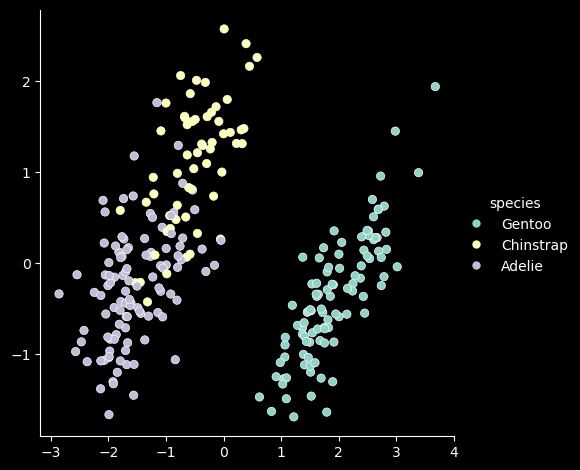

In [52]:
#Plot PCA results
sns.relplot(x=X_train_scaled_pca[:, 0], y=X_train_scaled_pca[:, 1], hue=y_train)

<h2><strong><u>Model Selection and Evaluation</u></strong></h2>

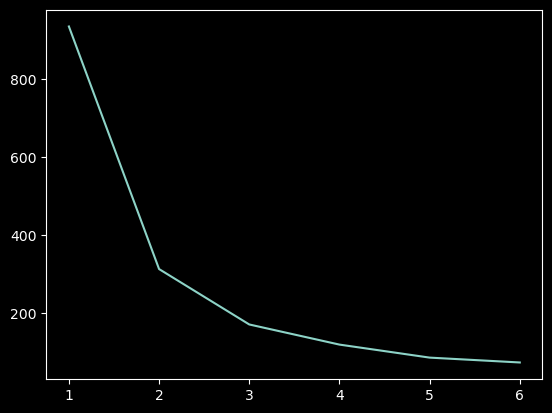

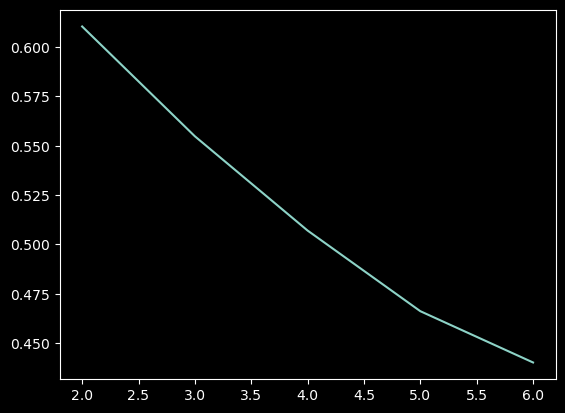

In [53]:
wss_values = []
sil_values = []
for k in range(1, 7):
    clusters = KMeans(n_clusters=k).fit(X_train_scaled_pca)
    wss_values.append(clusters.inertia_)
    if k > 1: sil_values.append(silhouette_score(X_train_scaled_pca, clusters.labels_))
plt.plot(range(1, 7), wss_values)
plt.figure()
plt.plot(range(2, 7), sil_values)

In [57]:
clusters_train = KMeans(n_clusters=3).fit(X_train_scaled_pca)
train_conf_matrix = pair_confusion_matrix(y_train, clusters_train.labels_)
display(train_conf_matrix)

array([[42710,  3032],
       [ 3968, 20780]])

In [36]:
clusters_test = KMeans(n_clusters=3).fit(X_test_scaled_pca)
test_conf_matrix = pair_confusion_matrix(y_test, clusters_test.labels_)
display(test_conf_matrix)

array([[2024,  806],
       [ 260, 1332]])

In [38]:
display("Pairwise training accuracy: ", (train_conf_matrix[0][0]+train_conf_matrix[1][1]) / (train_conf_matrix[0][0]+train_conf_matrix[0][1] + train_conf_matrix[1][0] + train_conf_matrix[1][1]))
display("Pairwise testing accuracy: ", (test_conf_matrix[0][0]+test_conf_matrix[1][1]) / (test_conf_matrix[0][0]+test_conf_matrix[0][1] + test_conf_matrix[1][0] + test_conf_matrix[1][1]))

'Pairwise training accuracy: '

np.float64(0.8747056320045397)

'Pairwise testing accuracy: '

np.float64(0.7589326096788783)